# 07. 변수선택 실습

김보람  
2023-05-09

> 해당 자료는 전북대학교 이영미 교수님 2023응용통계학 자료임

# 변수선택

In [2]:
dt <- data.frame(

 x1 = c(7,1,11,11,7,11,3,1,2,21,1,11,10),
 x2 = c(26,29,56,31,52,55,71,31,54,47,40,66,68),
 x3 = c(6,15,8,8,6,9,17,22,18,4,23,9,8),
 x4 = c(60,52,20,47,33,22,6,44,22,26,34,12,12),
 y = c(78.5,74.3,104.3,87.6,95.9,109.2,102.7,72.5,93.1,115.9,83.8,113.3,109.4)
)


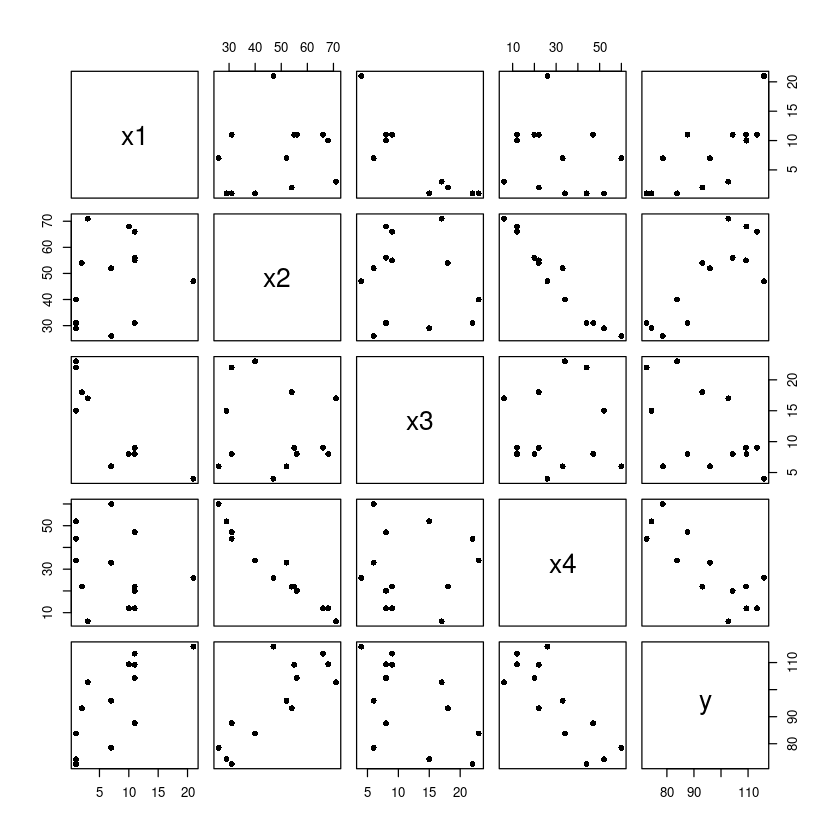

In [3]:
pairs(dt, pch=16)
cor(dt)

-   Full Model :
    $𝑦 = 𝛽_0 + 𝛽_1𝑥_1 + 𝛽_2𝑥_2 + 𝛽_3𝑥_3 + 𝛽_4𝑥_4 + \epsilon$

In [4]:
m <- lm(y~., dt) ##FM
summary(m)

> 모형은 유의하게 나오고 R^2도 값이 크게나오는데, 회귀계수는 하나도
> 유의한게 없다? 다중공산성 때문에

## 후진제거법

In [5]:
summary(m)

> 부분 F통계량, F통계량 = t^2 (t검정)
>
> $H_0:\beta_1= 0$
>
> 위의 `t value` 제곱하면 부분 F통계량이 됨
>
> t-value의 절대값이 가장 작은 값을 찾아주면 됨 -\> x3

In [6]:
drop1(m, test = "F") #x3 제거
# m에서 F통계량 사요하여 제거한것 확인

> `RSS`: SSE
>
> `F value` : $F=\dfrac{SSE_{RM}-SSE_{FM}}{SSE_{FM}/(n-p-1)}$ F값이
> 작을수록 유의하지 않다. 클수록 유의하다.
>
> 3번째값이 가장 작은 값을 갖다. 유의확률이 제일 크니까 변수가 제거된다.

In [7]:
m1 <- update(m, ~ . -x3)
summary(m1) #x4 제거

> $lm(y$~$x_1+x_2+x_4, dt)$ 라고 표현해도 된다.
>
> x1이 유의해졌다. (x3과 다중공산성이 심했었다)

In [8]:
drop1(m1, test = "F")

> Fvalue의 x4가 가장 작으므로 제거하자. 유의하지 않다.

In [9]:
m2 <- update(m1, ~ . -x4)
summary(m2) 


In [10]:
drop1(m2, test = "F")

> `F value`가 작은 x1을 제거할까? 하고 보니까 통계적으로 유의하므로
> 제거하지 않는다.

## 전진선택법

-   Start model : $𝑦 = 𝛽_0 + \epsilon$

In [11]:
m0 = lm(y ~ 1, data = dt)

In [12]:
add1(m0,
 scope = y ~ x1 + x2 + x3+ x4,
 test = "F") ## x4추가

> F값이 크면 좋음. x4가 좋으니까 보면 유의하므로 추가하자.

In [13]:
m1 <- update(m0, ~ . +x4)
summary(m1)

In [14]:
add1(m1,
 scope = y ~ x1 + x2 + x3+ x4,
 test = "F") ## x1추가

> x1의 F갑싱 제일 크고 유의하므로 추가

In [15]:
m2 <- update(m1, ~ . +x1)
summary(m2)


In [16]:
add1(m2,
 scope = y ~ x1 + x2 + x3+ x4,
 test = "F") ## stop

> x2의 F값이 더 크지만, pr값이 애매해. 유의수준 a=0.05면 유의하지 않다.
> 모형에 포함될 수 없으므로 멈춘다.
>
> 최종 모형은 x1과 x4를 선택한 모형

## 단계적선택법

In [7]:
m0 = lm(y ~ 1, data = dt)
# 절편먼저 시작

In [18]:
add1(m0,
 scope = y ~ x1 + x2 + x3+ x4,
 test = "F") ## x4추가


In [19]:
m1 <- update(m0, ~ . +x4)
summary(m1)

In [20]:
add1(m1,
 scope = y ~ x1 + x2 + x3+ x4,
 test = "F") ## x1추가


In [21]:
m2 <- update(m1, ~ . +x1)

In [22]:
drop1(m2, test = "F") #제거 없음

> x1,x4 유의하니까 그대로 가져가자

In [23]:
add1(m2,
 scope = y ~ x1 + x2 + x3+ x4,
 test = "F") ## x2추가

> 유의수준 a=0.1로 보자

In [24]:
m3 <- update(m2, ~ . +x2)
summary(m3) 


In [25]:
drop1(m3, test="F") #x4 제거

> x2를 추가했기 때문에 x2는 보지 않고 x1과 x4만 보면 된다

In [26]:
m4 <- update(m3, ~ . -x4)
summary(m4)

In [27]:
add1(m4,
 scope = y ~ x1 + x2 + x3+ x4,
 test = "F") #stop

## AIC를 이용한 변수 선택법

-   모델 선택시 AIC가 작은 모델을 선택

### Backward - AIC

-   후진제거법 AIC로 해보기

-   step 함수: AIC가 기준임

In [28]:
model_back = step(m, direction = "backward")
summary(model_back)

Start:  AIC=26.94
y ~ x1 + x2 + x3 + x4

       Df Sum of Sq    RSS    AIC
- x3    1    0.1091 47.973 24.974
- x4    1    0.2470 48.111 25.011
- x2    1    2.9725 50.836 25.728
<none>              47.864 26.944
- x1    1   25.9509 73.815 30.576

Step:  AIC=24.97
y ~ x1 + x2 + x4

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- x4    1      9.93  57.90 25.420
- x2    1     26.79  74.76 28.742
- x1    1    820.91 868.88 60.629

``` r
     Df Sum of Sq    RSS    AIC
- x3    1    0.1091 47.973 24.974
- x4    1    0.2470 48.111 25.011
- x2    1    2.9725 50.836 25.728
<none>              47.864 26.944
- x1    1   25.9509 73.815 30.576
```

-x3을 뺐을때 aic.. -x4을 뺏을때 aic…

-   AIC가 작으면 작을수록 좋다.그래서 x3빼자

-   x2와 x4가 애매하긴 하지만,,

### Forward - AIC

-   전진선택법

In [29]:
model_forward = step(
 m0,
 scope = y ~ x1 + x2 + x3+ x4,
 direction = "forward")
summary(model_forward)

Start:  AIC=71.44
y ~ 1

       Df Sum of Sq     RSS    AIC
+ x4    1   1831.90  883.87 58.852
+ x2    1   1809.43  906.34 59.178
+ x1    1   1450.08 1265.69 63.519
+ x3    1    776.36 1939.40 69.067
<none>              2715.76 71.444

Step:  AIC=58.85
y ~ x4

       Df Sum of Sq    RSS    AIC
+ x1    1    809.10  74.76 28.742
+ x3    1    708.13 175.74 39.853
<none>              883.87 58.852
+ x2    1     14.99 868.88 60.629

Step:  AIC=28.74
y ~ x4 + x1

       Df Sum of Sq    RSS    AIC
+ x2    1    26.789 47.973 24.974
+ x3    1    23.926 50.836 25.728
<none>              74.762 28.742

Step:  AIC=24.97
y ~ x4 + x1 + x2

       Df Sum of Sq    RSS    AIC
<none>              47.973 24.974
+ x3    1   0.10909 47.864 26.944

### Step - AIC

In [30]:
model_step = step(
 m0,
 scope = y ~ x1 + x2 + x3+ x4,
 direction = "both")
summary(model_step)

Start:  AIC=71.44
y ~ 1

       Df Sum of Sq     RSS    AIC
+ x4    1   1831.90  883.87 58.852
+ x2    1   1809.43  906.34 59.178
+ x1    1   1450.08 1265.69 63.519
+ x3    1    776.36 1939.40 69.067
<none>              2715.76 71.444

Step:  AIC=58.85
y ~ x4

       Df Sum of Sq     RSS    AIC
+ x1    1    809.10   74.76 28.742
+ x3    1    708.13  175.74 39.853
<none>               883.87 58.852
+ x2    1     14.99  868.88 60.629
- x4    1   1831.90 2715.76 71.444

Step:  AIC=28.74
y ~ x4 + x1

       Df Sum of Sq     RSS    AIC
+ x2    1     26.79   47.97 24.974
+ x3    1     23.93   50.84 25.728
<none>                74.76 28.742
- x1    1    809.10  883.87 58.852
- x4    1   1190.92 1265.69 63.519

Step:  AIC=24.97
y ~ x4 + x1 + x2

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- x4    1      9.93  57.90 25.420
+ x3    1      0.11  47.86 26.944
- x2    1     26.79  74.76 28.742
- x1    1    820.91 868.88 60.629

-   추가하는거랑 빼는거랑 동시에 진행

## regsubsets

In [50]:
m_full <-lm(y~.,dt)
summary(m_full)

### nbest=1

In [52]:
fit <- regsubsets(y~., data=dt, nbest=1, nvmax=9, method='exhaustive',)

In [53]:
summary(fit)

-   설명변수 1개, 2개, 3개 , 4개썼을때 제일 좋은 모형을 불러와 :nbest=1

In [54]:
with(summary(fit), round(cbind(which,rss,rsq,adjr2,cp,bic),3))

### nbest=2

In [55]:
fit <- regsubsets(y~., data=dt, nbest=2, nvmax=9, method='exhaustive',)

In [56]:
summary(fit)

-   좋았던걸 2개씩 리턴

### nbest=6

In [57]:
fit <- regsubsets(y~., data=dt, nbest=6, nvmax=9, method='exhaustive',)
summary(fit)

In [58]:
with(summary(fit), round(cbind(which,rss,rsq,adjr2,cp,bic),3))

### nvmax=2

-   설명변수 최대 2개까지만

In [59]:
fit <- regsubsets(y~., data=dt, nbest=6, nvmax=2, method='exhaustive',)
summary(fit)

# 자동차 연비 자료 분석

In [34]:
str(mtcars)

'data.frame':   32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...

In [35]:
round(cor(mtcars),2)

> mpg(연비)가 y이고 y와 상관관계가 가장 높은것은 wt(차무게), hp(마력)

In [36]:
m_full <- lm(mpg~., mtcars)
summary(m_full)


> 다중공산성 떄문에 회귀계수는 다 유의하지 않게 나옴

In [40]:
library(leaps)

In [43]:
fit<-regsubsets(mpg~., data=mtcars, nbest=1,nvmax=9,
# method=c("exhaustive"(모든가능한),"backward", "forward", "seqrep")
method='exhaustive',
)


In [42]:
summary(fit)


> 설명변수 2개를 쓴거는 $_{10}C_{2}=45$개 모형을 만들 수 있음. $R^2$을
> 봐서 좋은걸 보면 cyl이랑 wt쓴게 제일 좋은 모형이야.

> 설명변수 1개를 쓴다면 그 중에서 wt쓴거의 $R^2$가 제일 좋아.

> 설명변수 3개는 wt,qsec,am 쓴게 제일 좋아

-   `Forced in`: 나는 이 변수가 꼭 들어갔으면 좋겠어

-   `Forced out` : 나는 이변수가 꼭 뺐으면 좋겠어

-   10개 쓴거가 full model 이고 설명변수를 1개 2개 3개 쓴…

In [44]:
with(summary(fit),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

`which,rss,rsq,adjr2,cp,bic`

-   which:어떤 변수를 썼는지?

-   rss: sse 작을 수록 좋다. -\> `147.574` 제일작은데, 원래 제일 복잡한
    모형이 제일 작다. 감소하는 차이를 보자..

-   rsq : $R^2$ 크면 좋은데 둔화되는 점까지 보자.

-   adjr2 : $R^2_{adj}$ 크면 좋다. `0.838` 5개

-   cp: 작으면 좋다. $cp \leq p+1$ `0.103` 3개

-   bic: 작으면 좋다. `-46.773` 3개

> 3개를 쓰는게 좋을 거 같다.

In [45]:
fit_3<-lm(mpg~wt+qsec+am,mtcars)
summary(fit_3)

In [46]:
fit_4<-lm(mpg~hp+wt+qsec+am,mtcars)
summary(fit_4)

In [48]:
fit<-regsubsets(mpg~., data=mtcars, nbest=1,nvmax=9,
# method=c("exhaustive"(모든가능한),"backward", "forward", "seqrep")
method='backward',
)
summary(fit)

-   10번째부터 시작해서 거꾸로 올라감. 맨처음에 cyl이 빠지고 9개

-   그다음 vs가 빠짐

-   그다음 carb가 빠짐.

In [60]:
fit<-regsubsets(mpg~., data=mtcars, nbest=45,nvmax=9,
method='exhaustive',
)
summary(fit)

-   nbest값을 너무 크게 주면 값이 너무 많아져서 에러메시지가뜬다.

In [61]:
fit<-regsubsets(mpg~., data=mtcars, nbest=45,nvmax=9,
method='exhaustive', really.big=T
)
summary(fit)

In [63]:
fit<-regsubsets(mpg~., data=mtcars, nbest=1,
method='backward',
)
summary(fit)
with(summary(fit),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

In [64]:
fit<-regsubsets(mpg~., data=mtcars, nbest=1,
method='forward',
)
summary(fit)
with(summary(fit),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))